# Practice3 (test_submission1_4, 2_4.csv)
> Public Score
> - test_submission1_3: 25136.09206
> - test_submission2_3: 28583.13469

In [99]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# column 보기 30개로 설정
pd.set_option('display.max_columns', 30)

In [100]:
# 데이터 경로 설정
file_path = os.path.join("c:\\Users\\prohe\\OneDrive\\바탕 화면\\알고리즘PBL2\\", 'data')
train_origin = pd.read_csv(file_path+'\dataset.csv')
test_origin = pd.read_csv(file_path+'\problem.csv')

In [101]:
train_origin.shape, test_origin.shape

((1340, 24), (130, 23))

In [102]:
# 전처리를 위한 원본 데이터 복사
train = train_origin.copy()
test = test_origin.copy()

In [103]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [104]:
downcast(train)
downcast(test)

67.2% 압축됨
68.7% 압축됨


Id  LotArea Street LotConfig  OverallQual  OverallCond  YearBuilt  \
0    1341    11200   Pave    Inside            5            5       1965   
1    1342     7200   Pave    Corner            5            7       1951   
2    1343    16905   Pave    Inside            5            6       1959   
3    1344     9180   Pave   CulDSac            5            7       1983   
4    1345     7200   Pave    Inside            5            7       1920   
..    ...      ...    ...       ...          ...          ...        ...   
125  1466    11478   Pave    Inside            8            5       2007   
126  1467    16321   Pave   CulDSac            5            6       1957   
127  1468     6324   Pave    Inside            4            6       1927   
128  1469     8500   Pave    Inside            4            4       1920   
129  1470     8544   Pave   CulDSac            5            6       1966   

     YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0            1965         1040      1040         0       1040         1   
1            2000          900       900         0        900         1   
2            1959         1350      1328         0       1328         1   
3            1983          840       884         0        884         1   
4            1996          530       581       530       1111         1   
..            ...          ...       ...       ...        ...       ...   
125          2008         1704      1704         0       1704         2   
126          1997         1484      1600         0       1600         1   
127          1950          520       520         0        520         1   
128          1950          649       649       668       1317         1   
129          2006         1228      1228         0       1228         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0             3             1             5           0   
1           0             3             1             5           0   
2           1             2             1             5           2   
3           0             2             1             5           0   
4           0             3             1             6           0   
..        ...           ...           ...           ...         ...   
125         0             3             1             7           1   
126         0             2             1             6           2   
127         0             1             1             4           0   
128         0             3             1             6           0   
129         1             3             1             6           0   

    GarageType  GarageYrBlt  GarageCars  GarageArea  YrSold  
0       Detchd         1965           1         384    2008  
1       Detchd         2005           2         576    2010  
2       Attchd         1959           1         308    2007  
3       Attchd         1983           2         504    2007  
4       Detchd         1935           1         288    2007  
..         ...          ...         ...         ...     ...  
125     Attchd         2008           3         772    2010  
126     Attchd         1957           1         319    2006  
127     Detchd         1920           1         240    2008  
128     Detchd         1920           1         250    2008  
129     Attchd         1966           1         271    2008  

[130 rows x 23 columns]

# 전처리

### 결측치 처리

In [105]:
# 최빈값 대체
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0], inplace=True)

In [106]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

### Feature engineering

In [107]:
train['YearBuilt'].max()      # 최신에 지어진 건물 연도 확인

2010

In [108]:
# 2011년을 기준으로 건물이 지어진 후 지난 시간(연)
train['YearBuiltDiff'] = 2011 - train['YearBuilt']
test['YearBuiltDiff'] = 2011 - test['YearBuilt']

In [109]:
train['YearRemodAdd'].max()     # 리모델링 연도 확인

2010

In [110]:
# 리모델링 여부 및 리모델링 후 지난 시간(연)
train['RemodAddDiff'] = 2011 - train['YearRemodAdd']
test['RemodAddDiff'] = 2011 - test['YearRemodAdd']

### 일부 feature 제거

In [111]:
no_use_features = ['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageArea', '1stFlrSF']

In [112]:
train.drop(no_use_features, axis=1, inplace=True)
test.drop(no_use_features, axis=1, inplace=True)

### 중복 데이터 제거

In [113]:
train.duplicated().sum()    # 중복 데이터 확인

2

In [114]:
train = train.drop_duplicates()     # 중복 데이터 제거

### 이상치 처리
> target 값인 SalePrice와 그와 상관관계가 매우 높은 몇 가지 feature만 이상치 처리를 좀 해주자.

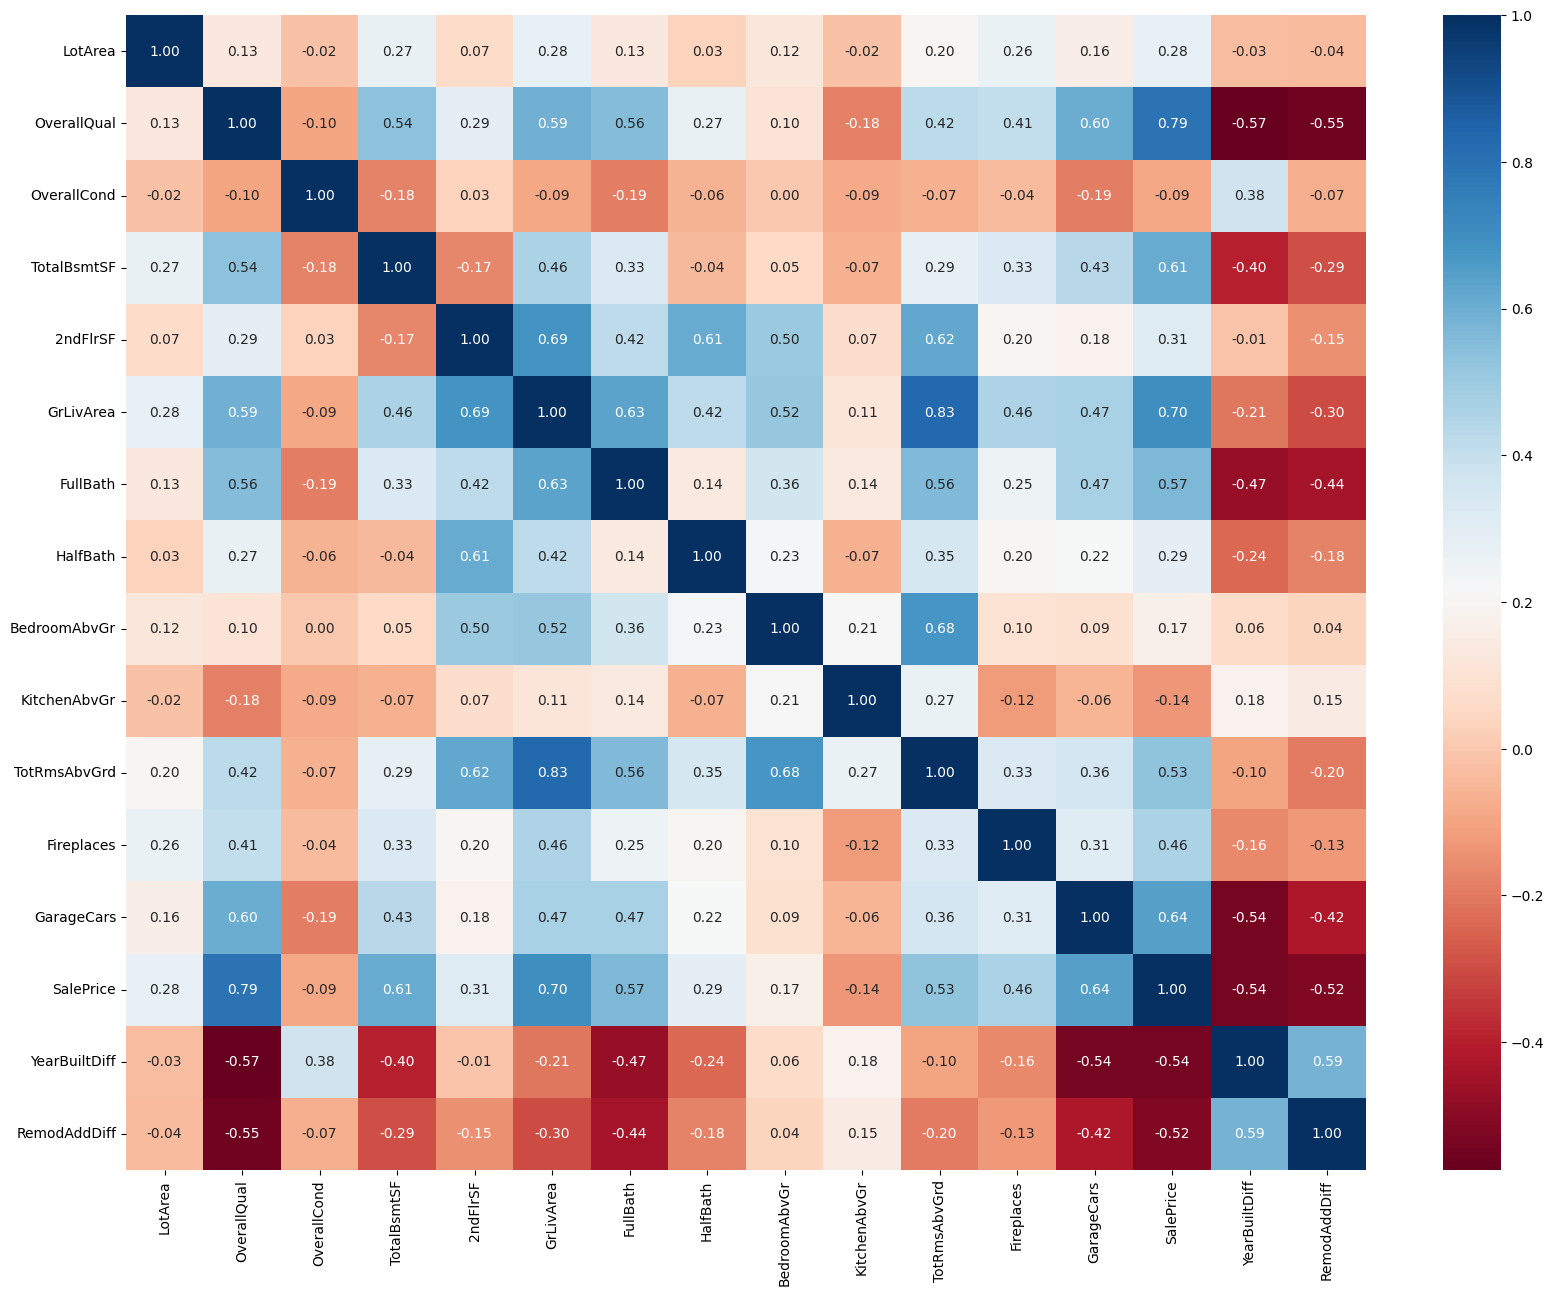

In [115]:
# 상관계수 히트맵
numeric_data = train.select_dtypes(exclude="object")   # 수치형 데이터만 추출
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='RdBu')    # cmap: 색상  # 절반만 표시하고 싶은 경우 mask=mask 옵션 추가
plt.show()

In [116]:
len(train.columns)

19

> GrLivArea

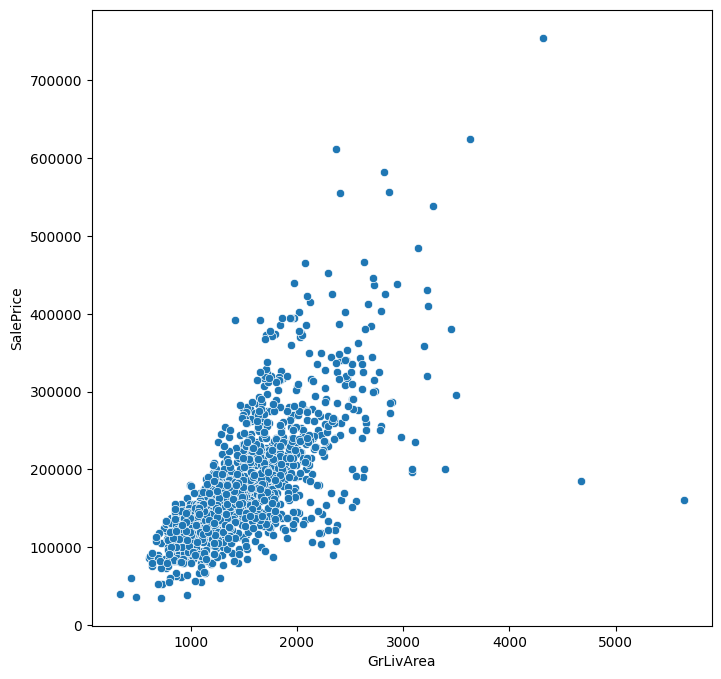

In [117]:
# GrLivArea와 SalePrice scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.show()

In [118]:
# 이상치 제거
outlier_index = train[(train['SalePrice']<220000)&(train['GrLivArea']>4000)]
train = train.drop(outlier_index.index).reset_index(drop=True)

In [119]:
# SalePrice 이상치 제거
train = train[train['SalePrice'] < 600000].reset_index(drop=True)

In [120]:
train

LotArea Street LotConfig  OverallQual  OverallCond  TotalBsmtSF  \
0        8450   Pave    Inside            7            5          856   
1        9600   Pave       FR2            6            8         1262   
2       11250   Pave    Inside            7            5          920   
3        9550   Pave    Corner            7            5          756   
4       14260   Pave       FR2            8            5         1145   
...       ...    ...       ...          ...          ...          ...   
1328     7917   Pave    Inside            6            5          953   
1329    13175   Pave    Inside            6            6         1542   
1330     9042   Pave    Inside            7            9         1152   
1331     9717   Pave    Inside            5            6         1078   
1332     9937   Pave    Inside            5            6         1256   

      2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0          854       1710         2         1             3             1   
1            0       1262         2         0             3             1   
2          866       1786         2         1             3             1   
3          756       1717         1         0             3             1   
4         1053       2198         2         1             4             1   
...        ...        ...       ...       ...           ...           ...   
1328       694       1647         2         1             3             1   
1329         0       2073         2         0             3             1   
1330      1152       2340         2         0             4             1   
1331         0       1078         1         0             2             1   
1332         0       1256         1         1             3             1   

      TotRmsAbvGrd  Fireplaces GarageType  GarageCars  SalePrice  \
0                8           0     Attchd           2     208500   
1                6           1     Attchd           2     181500   
2                6           1     Attchd           2     223500   
3                7           1     Detchd           3     140000   
4                9           1     Attchd           3     250000   
...            ...         ...        ...         ...        ...   
1328             7           1     Attchd           2     175000   
1329             7           2     Attchd           2     210000   
1330             9           2     Attchd           1     266500   
1331             5           0     Attchd           1     142125   
1332             6           0     Attchd           1     147500   

      YearBuiltDiff  RemodAddDiff  
0                 8             8  
1                35            35  
2                10             9  
3                96            41  
4                11            11  
...             ...           ...  
1328             12            11  
1329             33            23  
1330             70             5  
1331             61            15  
1332             46            46  

[1333 rows x 19 columns]

### Encoding

In [121]:
# X, y 분리
X_train = train.drop(columns='SalePrice', axis=1)
y_train = train['SalePrice']

In [122]:
all_data = pd.concat([X_train, test], axis=0).reset_index(drop=True)

In [123]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical = all_data.select_dtypes(include='object').columns

for feature in categorical:
    all_data[feature] = encoder.fit_transform(all_data[feature])

# category는 OHE, 순서형 데이터는 LabelEncoding 분리해보기

In [124]:
X_train = all_data.iloc[:len(X_train)]
test = all_data.iloc[len(X_train):].reset_index(drop=True)

In [125]:
X_train

LotArea  Street  LotConfig  OverallQual  OverallCond  TotalBsmtSF  \
0        8450       1          4            7            5          856   
1        9600       1          2            6            8         1262   
2       11250       1          4            7            5          920   
3        9550       1          0            7            5          756   
4       14260       1          2            8            5         1145   
...       ...     ...        ...          ...          ...          ...   
1328     7917       1          4            6            5          953   
1329    13175       1          4            6            6         1542   
1330     9042       1          4            7            9         1152   
1331     9717       1          4            5            6         1078   
1332     9937       1          4            5            6         1256   

      2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0          854       1710         2         1             3             1   
1            0       1262         2         0             3             1   
2          866       1786         2         1             3             1   
3          756       1717         1         0             3             1   
4         1053       2198         2         1             4             1   
...        ...        ...       ...       ...           ...           ...   
1328       694       1647         2         1             3             1   
1329         0       2073         2         0             3             1   
1330      1152       2340         2         0             4             1   
1331         0       1078         1         0             2             1   
1332         0       1256         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageType  GarageCars  YearBuiltDiff  \
0                8           0           1           2              8   
1                6           1           1           2             35   
2                6           1           1           2             10   
3                7           1           5           3             96   
4                9           1           1           3             11   
...            ...         ...         ...         ...            ...   
1328             7           1           1           2             12   
1329             7           2           1           2             33   
1330             9           2           1           1             70   
1331             5           0           1           1             61   
1332             6           0           1           1             46   

      RemodAddDiff  
0                8  
1               35  
2                9  
3               41  
4               11  
...            ...  
1328            11  
1329            23  
1330             5  
1331            15  
1332            46  

[1333 rows x 18 columns]

In [136]:
# SMOTE-Tomek oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

# Model training

### XGBoost

In [29]:
# 베이지안 최적화
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
    return rmse, rmse.mean()

param_bounds = {
    'learning_rate' : (0.001, 0.5),
    'max_leaves': (2, 1024),
    'n_estimators': (100, 2000),
    'max_depth': (3, 15),
    'min_child_weight': (1, 30),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    }

def eval_function(max_leaves, learning_rate, n_estimators, max_depth, min_child_weight, reg_alpha, reg_lambda):
    params = {
        'learning_rate' : learning_rate, 
        'max_leaves': int(max_leaves),
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'min_child_weight': min_child_weight,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
    }

    xgb_model = XGBRegressor(**params, random_state=42)
    score, mean_score = rmse_cv(xgb_model)
    return -mean_score

In [30]:
from bayes_opt import BayesianOptimization

xgb_optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=42)
xgb_optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | learni... | max_depth | max_le... | min_ch... | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------
| 1         | -2.546e+0 | 0.1879    | 14.41     | 750.1     | 18.36     | 396.4     | 0.156     | 0.05808   |
| 2         | -2.685e+0 | 0.4332    | 10.21     | 725.7     | 1.597     | 1.943e+03 | 0.8324    | 0.2123    |
| 3         | -2.451e+0 | 0.09173   | 5.201     | 312.9     | 16.22     | 920.7     | 0.2912    | 0.6119    |
| 4         | -2.463e+0 | 0.07061   | 6.506     | 376.4     | 14.23     | 1.592e+03 | 0.1997    | 0.5142    |
| 5         | -2.436e+0 | 0.2966    | 3.557     | 622.9     | 5.945     | 223.6     | 0.9489    | 0.9656    |
| 6         | -2.552e+0 | 0.2514    | 5.459     | 305.5     | 20.91     | 916.2     | 0.6271    | 0.8236    |
| 7         | -2.324e+0 | 0.03312   | 4.308     | 918.1     | 25.65     | 1.529e+03 | 0.2789    | 0.4978    |
| 8       

In [31]:
# 최적화된 하이퍼파라미터로 모델 재학습
best_xgb_params = {
    'n_estimators': round(xgb_optimizer.max['params']['n_estimators']),
    'max_depth': round(xgb_optimizer.max['params']['max_depth']),
    'max_leaves': round(xgb_optimizer.max['params']['max_leaves']),
    'min_child_weight': round(xgb_optimizer.max['params']['min_child_weight']),
    'learning_rate': xgb_optimizer.max['params']['learning_rate'],
    'reg_alpha': xgb_optimizer.max['params']['reg_alpha'],
    'reg_lambda': xgb_optimizer.max['params']['reg_lambda'],
}

best_xgb = XGBRegressor(**best_xgb_params, random_state=42)
xgb_score, xgb_mean_score = rmse_cv(best_xgb)
print(xgb_score)
print(xgb_mean_score)

[22217.40679414 21777.74049132 21820.0899575  28241.77570218
 30093.83842122 19171.58740153 19813.87208011 18772.27678997
 23829.29201243 26707.65242321]
23244.553207360354


In [33]:
# 모델의 결정계수 확인
from sklearn.metrics import r2_score

best_xgb = XGBRegressor(**best_xgb_params, random_state=42)
best_xgb.fit(X_train, y_train)
xgb_pred = best_xgb.predict(X_train)

xgb_r2 = r2_score(xgb_pred, y_train)
xgb_r2

0.9682022138893314

### LightGBM

In [96]:
# 베이지안 최적화
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10))
    return rmse, rmse.mean()

param_bounds = {
    'n_estimators': (100, 1000),
    'max_depth': (3, 15),
    'num_leaves': (20, 300),
    'min_child_samples': (10, 30),
    'learning_rate': (0.001, 0.5),
}

def eval_function(n_estimators, max_depth, num_leaves, min_child_samples, learning_rate):
    params = {
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'num_leaves': int(num_leaves),
        'min_child_samples': int(min_child_samples),
        'learning_rate': learning_rate,
    }

    lgbm = LGBMRegressor(**params, metric='RMSE', random_state=42, verbose=0)
    score, mean_score = rmse_cv(lgbm)
    return -mean_score

In [97]:
from bayes_opt import BayesianOptimization

lgbm_optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=42)
lgbm_optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... | num_le... |
-------------------------------------------------------------------------------------
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [98]:
# 최적화된 하이퍼파라미터로 모델 재학습
best_params = {
    'n_estimators': round(lgbm_optimizer.max['params']['n_estimators']),
    'max_depth': round(lgbm_optimizer.max['params']['max_depth']),
    'num_leaves': round(lgbm_optimizer.max['params']['num_leaves']),
    'min_child_samples': round(lgbm_optimizer.max['params']['min_child_samples']),
    'learning_rate': lgbm_optimizer.max['params']['learning_rate'],
}

best_lgbm = LGBMRegressor(**best_params, metric='RMSE', random_state=42, verbose=0)
score, mean_score = rmse_cv(best_lgbm)
print(score, mean_score)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [99]:
best_lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(learning_rate=0.07884126564776513, max_depth=4, metric='RMSE',
              min_child_samples=27, n_estimators=641, num_leaves=218,
              random_state=42, verbose=0)

In [100]:
# 모델의 결정계수 확인
from sklearn.metrics import r2_score
y_pred = best_lgbm.predict(X_train_scaled)

r2_score(y_pred, y_train)

0.9703054174450539

# 결과 제출

In [34]:
# submission 파일 생성
submission_origin = pd.read_csv(file_path+'\submission.csv')
submission = submission_origin.copy()

In [35]:
# 최종 모델(XGBRegressor)로 test set 예측
xgb_pred = best_xgb.predict(test)

submission['SalePrice'] = xgb_pred
submission.to_csv('Case5.csv', index=False)